<a href="https://colab.research.google.com/github/krsha-nit/PyTorch/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [64]:
# data points = 100, features = 1
N,D=100,1

# random data on x-axis in (-5,5)
X = np.random.random(N)*10-5
# line plus some noise (slope = 0.5, intercept = -1)
Y = 0.5*X - 1 +np.random.randn(N)

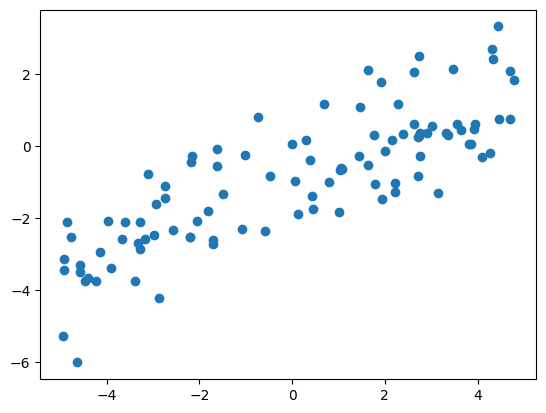

In [65]:
plt.scatter(X,Y)

In [66]:
# 1. create the model

model = nn.Linear(1,1) # (inputs/features,outputs)
## loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

## our data must be of shape (num_samples * num_dimensions)
X = X.reshape(N,1)
Y = Y.reshape(N,1)
## PyTorch uses float32 by default and NumPy creates float64 by default; that's why we have to cast it to float32 and torch tensors
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))


In [67]:
type(inputs),type(targets)

(torch.Tensor, torch.Tensor)

In [68]:
# 2. train the model

n_epochs = 40
losses = []

for epoch in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()
  # forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)
  # appending loss of each epoch to losses
  losses.append(loss.item())
  # backward and optimize
  loss.backward()
  optimizer.step()
  print(f"Epoch {epoch+1}/{n_epochs}, Loss: {loss.item():.4f}")

Epoch 1/40, Loss: 15.6244
Epoch 2/40, Loss: 11.0155
Epoch 3/40, Loss: 7.8649
Epoch 4/40, Loss: 5.7110
Epoch 5/40, Loss: 4.2384
Epoch 6/40, Loss: 3.2315
Epoch 7/40, Loss: 2.5431
Epoch 8/40, Loss: 2.0723
Epoch 9/40, Loss: 1.7504
Epoch 10/40, Loss: 1.5302
Epoch 11/40, Loss: 1.3796
Epoch 12/40, Loss: 1.2767
Epoch 13/40, Loss: 1.2062
Epoch 14/40, Loss: 1.1581
Epoch 15/40, Loss: 1.1251
Epoch 16/40, Loss: 1.1026
Epoch 17/40, Loss: 1.0872
Epoch 18/40, Loss: 1.0766
Epoch 19/40, Loss: 1.0694
Epoch 20/40, Loss: 1.0645
Epoch 21/40, Loss: 1.0611
Epoch 22/40, Loss: 1.0588
Epoch 23/40, Loss: 1.0572
Epoch 24/40, Loss: 1.0561
Epoch 25/40, Loss: 1.0554
Epoch 26/40, Loss: 1.0549
Epoch 27/40, Loss: 1.0545
Epoch 28/40, Loss: 1.0543
Epoch 29/40, Loss: 1.0541
Epoch 30/40, Loss: 1.0540
Epoch 31/40, Loss: 1.0540
Epoch 32/40, Loss: 1.0539
Epoch 33/40, Loss: 1.0539
Epoch 34/40, Loss: 1.0538
Epoch 35/40, Loss: 1.0538
Epoch 36/40, Loss: 1.0538
Epoch 37/40, Loss: 1.0538
Epoch 38/40, Loss: 1.0538
Epoch 39/40, Loss: 

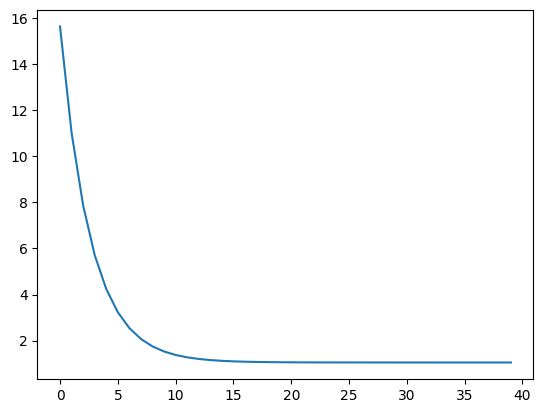

In [69]:
## plot the loss per epoch
plt.plot(losses)

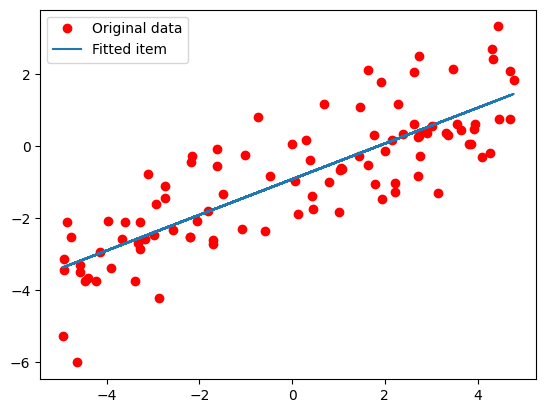

In [70]:
# 3. making predictions
predicted = model(inputs).detach().numpy() # outputs = model(inputs) will give us Torch Tensor, so have to detach it and covert to numpy

## plot the graph with best estimated line
plt.plot(X,Y,'ro',label="Original data")
plt.plot(X,predicted,label="Fitted item")
plt.legend()
plt.show()

In [71]:
## detach should be used to convert it to numpy, you directly try to covert to numpy, then will get error
model(inputs).numpy()

RuntimeError: ignored

In [72]:
## one other way to make prediction to numpy is to use with torch.no_grad()
with torch.no_grad():
  predicted_output = model(inputs).numpy()

predicted_output

array([[ 0.5263535 ],
       [ 0.43065488],
       [-2.278028  ],
       [-3.02191   ],
       [ 0.80399966],
       [ 1.2950649 ],
       [-2.5479546 ],
       [-0.9177075 ],
       [ 0.7369696 ],
       [ 0.85152125],
       [-2.8545408 ],
       [-0.38042963],
       [ 0.07703322],
       [ 0.4576962 ],
       [-1.7622926 ],
       [ 0.8943012 ],
       [-0.02690858],
       [-2.4596062 ],
       [-0.10780627],
       [-2.710177  ],
       [ 0.7511693 ],
       [ 0.14866567],
       [-0.09969491],
       [-0.1984412 ],
       [-3.3337786 ],
       [-2.5497966 ],
       [ 0.98119557],
       [-2.2826095 ],
       [ 0.04852951],
       [ 0.1850903 ],
       [-3.2826157 ],
       [-0.51939404],
       [-0.40565926],
       [-1.7242992 ],
       [ 1.2017219 ],
       [-0.6952982 ],
       [-2.3745983 ],
       [-1.2809781 ],
       [ 1.2352216 ],
       [-2.3444648 ],
       [-3.3596294 ],
       [-3.1389606 ],
       [-2.3967242 ],
       [ 0.44522452],
       [-0.5713532 ],
       [-0

In [73]:
# compared with our original line (w=0.5, b=-1)
w = model.weight.data.numpy()
b= model.bias.data.numpy()
print(f"w: {w}, b: {b}")

w: [[0.4970776]], b: [-0.9183154]


# Example 2: Moore's law

In [24]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2023-09-19 19:30:51--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-09-19 19:30:52 (20.5 MB/s) - ‘moore.csv’ saved [2302/2302]



In [48]:
# load the data
data = pd.read_csv("moore.csv",header=None).values # using .values -- get converted to numpy arrays
data[:5]

array([[1971, 2300],
       [1972, 3500],
       [1973, 2500],
       [1973, 2500],
       [1974, 4100]])

In [49]:
data[:5,0]

array([1971, 1972, 1973, 1973, 1974])

In [50]:
X = data[:,0].reshape(-1,1) # first column and reshaping it to 2-D array with size N*D where, D=1
Y = data[:,1].reshape(-1,1) # second column

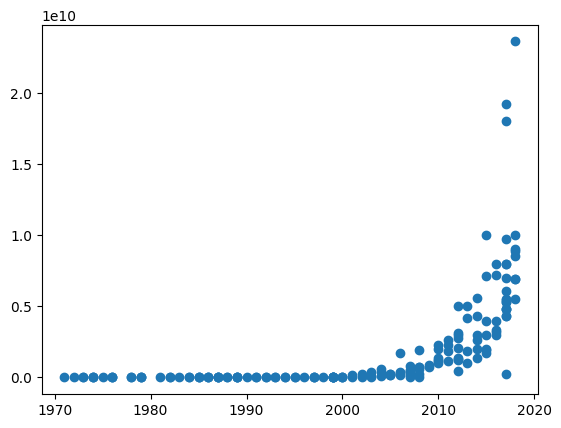

In [51]:
# plot - exponential
plt.scatter(X,Y)

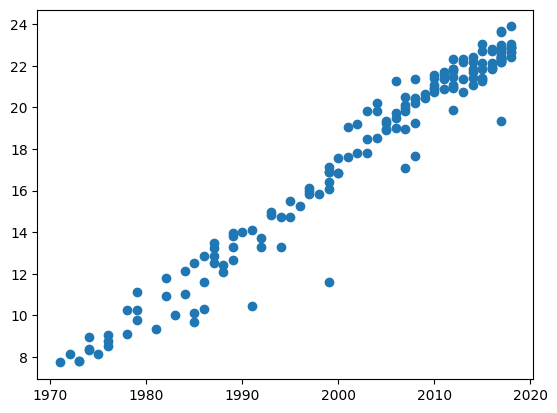

In [52]:
# since we are working with linear models, we will use log
Y = np.log(Y)
plt.scatter(X,Y)

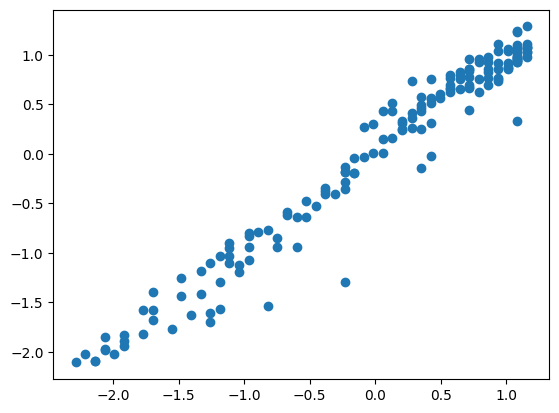

In [53]:
# scale and center (standardization) both x and y
mx = X.mean()
sx = X.std()
my = Y.mean()
sy = Y.std()
X = (X-mx)/sx
Y = (Y-my)/sy
plt.scatter(X,Y) # everything now will be centered around 0 with std deviation of 1

In [55]:
# casting to float32 and converting to torch tensors
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [57]:
# 1. create the model

## create the linear regression model
model = nn.Linear(1,1)
## loss and opotimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01,momentum=0.75)

In [58]:
# 2. train the model

n_epochs = 100
losses = []

for epoch in range(n_epochs):
  ## zero the parameter gradient
  optimizer.zero_grad()
  ## forward pass
  outputs = model(inputs)
  loss = criterion(outputs,targets)
  ## saving the losses
  losses.append(loss.item())
  ## backward pass and optimize
  loss.backward()
  optimizer.step()

  print(f"Epoch  {epoch+1}/{n_epochs}, loss:{loss.item():.4f}")

Epoch  1/100, loss:0.7414
Epoch  2/100, loss:0.7136
Epoch  3/100, loss:0.6668
Epoch  4/100, loss:0.6086
Epoch  5/100, loss:0.5450
Epoch  6/100, loss:0.4807
Epoch  7/100, loss:0.4188
Epoch  8/100, loss:0.3612
Epoch  9/100, loss:0.3092
Epoch  10/100, loss:0.2632
Epoch  11/100, loss:0.2233
Epoch  12/100, loss:0.1891
Epoch  13/100, loss:0.1603
Epoch  14/100, loss:0.1363
Epoch  15/100, loss:0.1165
Epoch  16/100, loss:0.1003
Epoch  17/100, loss:0.0872
Epoch  18/100, loss:0.0766
Epoch  19/100, loss:0.0682
Epoch  20/100, loss:0.0615
Epoch  21/100, loss:0.0562
Epoch  22/100, loss:0.0521
Epoch  23/100, loss:0.0488
Epoch  24/100, loss:0.0463
Epoch  25/100, loss:0.0444
Epoch  26/100, loss:0.0430
Epoch  27/100, loss:0.0418
Epoch  28/100, loss:0.0410
Epoch  29/100, loss:0.0403
Epoch  30/100, loss:0.0398
Epoch  31/100, loss:0.0395
Epoch  32/100, loss:0.0392
Epoch  33/100, loss:0.0390
Epoch  34/100, loss:0.0389
Epoch  35/100, loss:0.0388
Epoch  36/100, loss:0.0387
Epoch  37/100, loss:0.0386
Epoch  38/

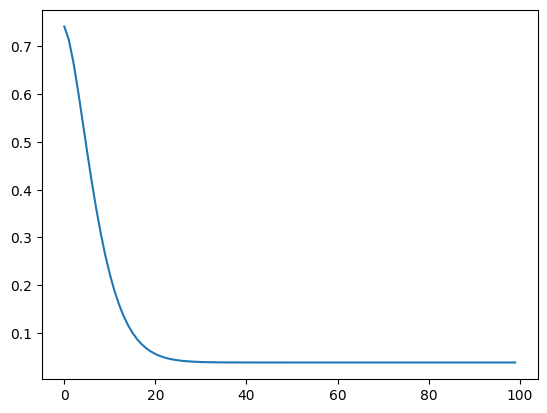

In [59]:
plt.plot(losses)

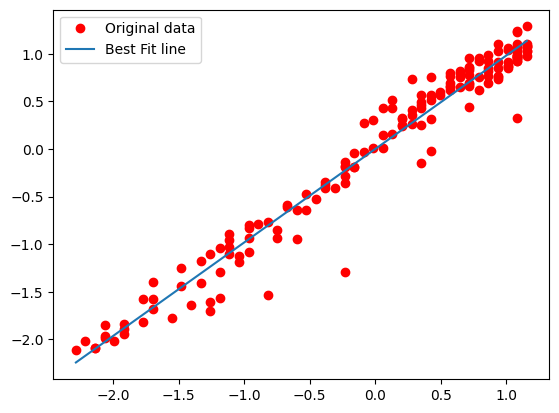

In [61]:
# 3. making predictions
predicted = model(inputs).detach().numpy()

## plot
plt.plot(X,Y,'ro',label="Original data")
plt.plot(X,predicted,label="Best Fit line")
plt.legend()
plt.show()

In [62]:
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(f"w: {w}, b: {b}")

w: [[0.98057157]], b: [1.1248667e-06]
